In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd
train_data = pd.read_csv('/content/drive/My Drive/Web Development/fraudTrain.csv')
test_data = pd.read_csv('/content/drive/My Drive/Web Development/fraudTest.csv')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

train_data = train_data.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'], axis=1)
test_data = test_data.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'], axis=1)
X_train = train_data.drop(['is_fraud'], axis=1)
y_train = train_data['is_fraud']
X_test = test_data.drop(['is_fraud'], axis=1)
y_test = test_data['is_fraud']

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.9961401355721147
Confusion Matrix:
[[553574      0]
 [  2145      0]]


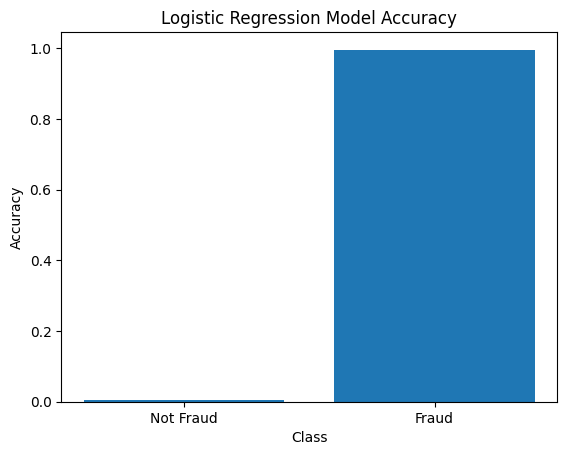

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

labels = ['Not Fraud', 'Fraud']
accuracy_values = [1 - accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_log_reg)]
plt.bar(labels, accuracy_values)
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Model Accuracy")
plt.show()


Decision Tree:
Accuracy: 0.9849564258195239
Confusion Matrix:
[[546818   6756]
 [  1604    541]]


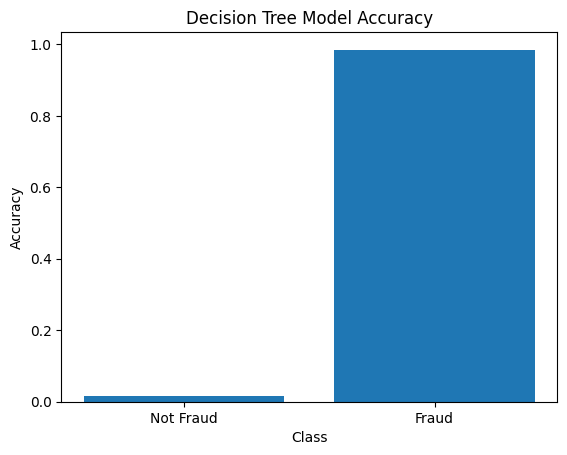

In [26]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dec_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dec_tree))

labels = ['Not Fraud', 'Fraud']
accuracy_values = [1 - dec_tree.score(X_test, y_test), dec_tree.score(X_test, y_test)]
plt.bar(labels, accuracy_values)
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.title("Decision Tree Model Accuracy")
plt.show()


Random Forest:
Accuracy: 0.9941967073287039
Confusion Matrix:
[[552247   1327]
 [  1898    247]]


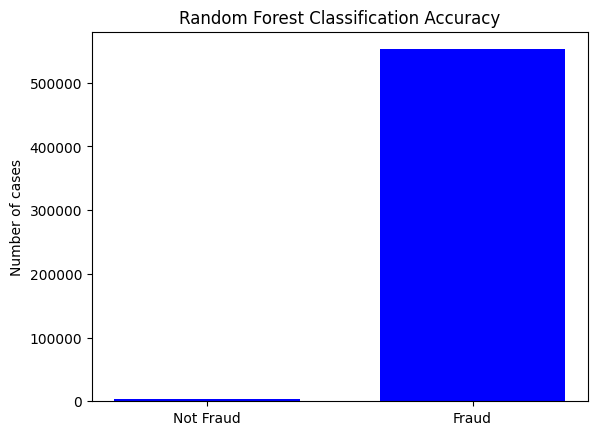

In [27]:
rand_forest = RandomForestClassifier(n_estimators=10)
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rand_forest))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rand_forest))

labels = ['Not Fraud', 'Fraud']
values = [
    (y_test != y_pred_rand_forest).sum(),
    (y_test == y_pred_rand_forest).sum()
]
fig, ax = plt.subplots()
width = 0.7
rects1 = ax.bar(labels, values, width, color='blue')
ax.set_ylabel('Number of cases')
ax.set_title('Random Forest Classification Accuracy')
ax.set_xticks(labels)
plt.show()
